In [1]:
from _element import feature_control as ft_c

In [2]:
from _usecase import algorithm_prophet as prpt
from _usecase._evaluation.compare import Cross_Validation

In [3]:
from _element import calculations as calc

In [4]:
import pandas as pd

In [5]:
from datetime import datetime

In [6]:
from _element import varr

In [7]:
INPUT_FILENAME= 'KPP일별투입(10_17)_withobject.xlsx'

In [8]:
df_raw= ft_c.xlsx_opener(varr.PJ_DIR+ '\\_element\\data\\private\\', INPUT_FILENAME)

In [9]:
df_raw

,ds,1041,1692,1815,1853,1878
0,2010-01-01,0,10,2652,0,0
1,2010-01-02,6260,3422,26443,459,626
2,2010-01-03,0,0,404,0,0
3,2010-01-04,5141,3641,22924,3445,3305
4,2010-01-05,5494,6552,39081,3861,4362
5,2010-01-06,10300,6924,41411,3353,6643
6,2010-01-07,11193,9513,42029,4317,3718
7,2010-01-08,12480,8382,45205,5338,6258
8,2010-01-09,4117,5148,31304,3463,3219
9,2010-01-10,0,0,336,0,0


In [10]:
df_temp= ft_c.xlsx_opener(varr.PJ_DIR+varr.TEMP_DATA_DIR, 'temp_data_merged.xlsx')

In [11]:
y_col= df_raw.columns.values.tolist()

In [12]:
try:
    y_col.remove('ds')
except ValueError:
    pass

In [13]:
y_col

[1041, 1692, 1815, 1853, 1878]

In [14]:
x_col= df_temp.columns.values.tolist()

In [15]:
x_col

['ds', 'temp_max', 'temp_min', 'rain_amount']

In [16]:
df_raw['ds']= pd.to_datetime(df_raw['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [17]:
df_temp['ds']= pd.to_datetime(df_temp['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [18]:
df_raw= pd.merge(df_raw, df_temp, how='inner', on='ds')

In [19]:
df_raw.head()

,ds,1041,1692,1815,1853,1878,temp_max,temp_min,rain_amount
0,2010-07-01,5698,9534,44580,5328,4003,30.500000,24.900000,0.0
1,2010-07-02,2740,7910,44920,6644,5629,25.799999,22.700001,70.0
2,2010-07-03,2742,4176,26213,5111,2706,25.600000,22.600000,1.0
3,2010-07-04,0,0,299,746,0,29.700001,23.100000,0.0
4,2010-07-05,3451,4844,39234,5927,2700,30.600000,21.799999,0.0


In [24]:
df_weekday_weekdays= df_raw.loc[df_raw.ds.apply(lambda x: (x.weekday())>=0 and x.weekday()<=4)]
df_weekday_sat= df_raw.loc[df_raw.ds.apply(lambda x: x.weekday())==5]
df_weekday_sun= df_raw.loc[df_raw.ds.apply(lambda x: x.weekday())==6]

In [21]:
df_weekday= {}
for y in y_col:
    df_weekday[y]= {}
    df_weekday[y]['weekday']= ft_c.train_test_sample(df_weekday_weekdays, y, x_col, forecastday= 5)
    df_weekday[y]['sat']= ft_c.train_test_sample(df_weekday_sat, y, x_col, forecastday= 1)
    df_weekday[y]['sun']= ft_c.train_test_sample(df_weekday_sun, y, x_col, forecastday= 1)

In [22]:
# cv_5= Cross_Validation()

In [23]:
# cv_5.slice(df_raw, 'y', x_col)

In [24]:
# cv_5.cv_data

In [25]:
# cv_5.func_run(func= prpt.Bayseian2, extract_func= prpt.extract_info_from, output= 'sMAPE', unit= 'day')

In [26]:
result_dict= {}
for y in y_col:
    result_dict[y]= {
                    'weekday': prpt.Bayseian2(df_weekday[y]['weekday'], 'week', holidaybeta= varr.HOLYDAYBETA_revised),\
                    'sat': prpt.Bayseian2(df_weekday[y]['sat'], 'week', holidaybeta= varr.HOLYDAYBETA_revised),\
                    'sun': prpt.Bayseian2(df_weekday[y]['sun'], 'week', holidaybeta= varr.HOLYDAYBETA_revised),\
                    }

In [27]:
merged_dict={}
for y in y_col:
    merged_dict[y]={'future': 
                    pd.concat([result_dict[y]['weekday']['future'],\
                              result_dict[y]['sat']['future'],\
                              result_dict[y]['sun']['future']],\
                              axis= 0).sort_values(by='ds', axis=0),
                   'forecastProphetTable':
                    pd.concat([result_dict[y]['weekday']['forecastProphetTable'],
                              result_dict[y]['sat']['forecastProphetTable'],\
                              result_dict[y]['sun']['forecastProphetTable']],\
                              axis= 0).sort_values(by='ds', axis=0)
                   }

In [28]:
forecast_dict={}
print(INPUT_FILENAME)
for y in y_col:
    merged_dict[y]['future']['ds']= pd.to_datetime(merged_dict[y]['future']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    merged_dict[y]['forecastProphetTable']['ds']= pd.to_datetime(merged_dict[y]['forecastProphetTable']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    forecast_dict[y]= prpt.extract_info_from(merged_dict[y]['future'], merged_dict[y]['forecastProphetTable'], varr.FORECASTDAY)
    forecast_dict[y]['result_df']= pd.merge(forecast_dict[y]['result_df'], df_raw[['ds', y]], how='inner', on='ds')
    print('RMSE with segment '+str(y)+': '+str(calc.rms_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE with segment '+str(y)+': '+str(calc.map_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_with_std with segment '+str(y)+': '+str(calc.map_error_with_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_div_std with segment '+str(y)+': '+str(calc.map_error_div_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('sMAPE of company code '+str(y)+': '+str(calc.smap_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print(forecast_dict[y]['result_df'].head())
    ft_c.save_as_xlsx(varr.PJ_DIR+varr.DF_DIR, forecast_dict[y]['result_df'], INPUT_FILENAME, '_seg'+str(y)+'withweekday')
    print('\n')

KPP일별투입(10_17)_withobject.xlsx
RMSE with segment 1041: 1320.49283719
MAPE with segment 1041: inf
MAPE_with_std with segment 1041: 34.1409746052
MAPE_div_std with segment 1041: 77.1996039906
sMAPE of company code 1041: 17.687922583
          ds  temp_max  temp_min  rain_amount         yhat  1041
0 2017-11-24       2.9      -2.5          0.1  5757.080021  8733
1 2017-11-25       6.4       0.8         15.7  4985.956943  5100
2 2017-11-26       6.4      -2.4          0.0   -13.646067     0
3 2017-11-27       8.1       1.8          0.0  5823.449742  4866
4 2017-11-28       9.8       4.2          1.2  5853.914537  5723


RMSE with segment 1692: 785.665635451
MAPE with segment 1692: inf
MAPE_with_std with segment 1692: 17.0984171697
MAPE_div_std with segment 1692: 94.3117768394
sMAPE of company code 1692: 4.206271642
          ds  temp_max  temp_min  rain_amount          yhat   1692
0 2017-11-24       2.9      -2.5          0.1  18102.098197  18452
1 2017-11-25       6.4       0.8         15.

C:\Nextop\nextop-engine\nextop_engine\_element\calculations.py:13: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




RMSE with segment 1853: 881.996086902
MAPE with segment 1853: inf
MAPE_with_std with segment 1853: 38.1794180367
MAPE_div_std with segment 1853: 91.6703147711
sMAPE of company code 1853: 15.3599783423
          ds  temp_max  temp_min  rain_amount         yhat  1853
0 2017-11-24       2.9      -2.5          0.1  5023.617611  5928
1 2017-11-25       6.4       0.8         15.7  1742.167680  1885
2 2017-11-26       6.4      -2.4          0.0  -231.396308     0
3 2017-11-27       8.1       1.8          0.0  5059.843708  5417
4 2017-11-28       9.8       4.2          1.2  5131.570591  7159


RMSE with segment 1878: 935.338986937
MAPE with segment 1878: inf
MAPE_with_std with segment 1878: 27.4363482867
MAPE_div_std with segment 1878: 76.7018413672
sMAPE of company code 1878: 15.5071438747
          ds  temp_max  temp_min  rain_amount         yhat  1878
0 2017-11-24       2.9      -2.5          0.1  5917.981791  7409
1 2017-11-25       6.4       0.8         15.7  2747.706652  2604
2 2017-11

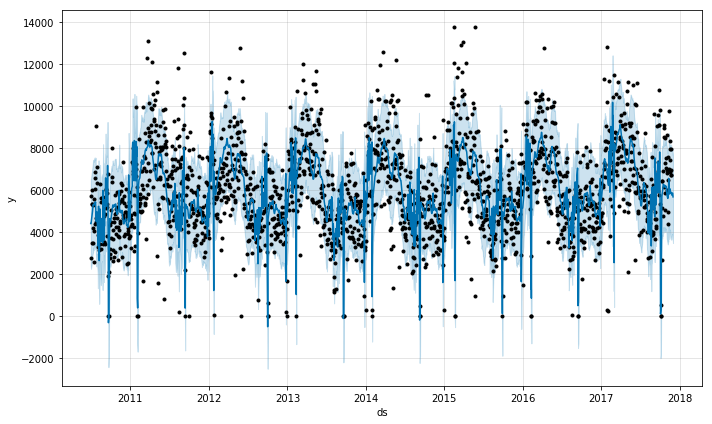

In [29]:
result_dict[1041]['weekday']['model'].plot(result_dict[1041]['weekday']['forecastProphetTable'])

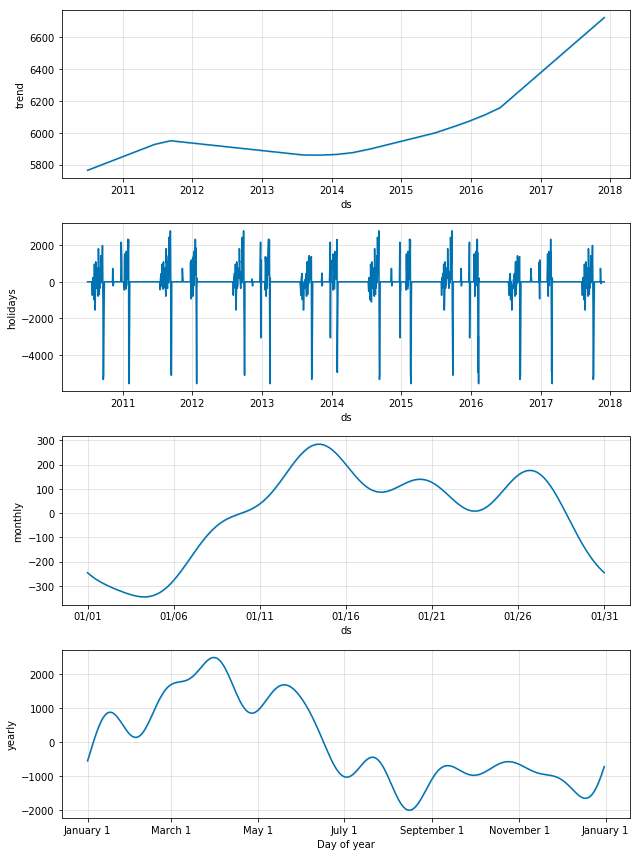

In [30]:
result_dict[1041]['weekday']['model'].plot_components(result_dict[1041]['weekday']['forecastProphetTable'])

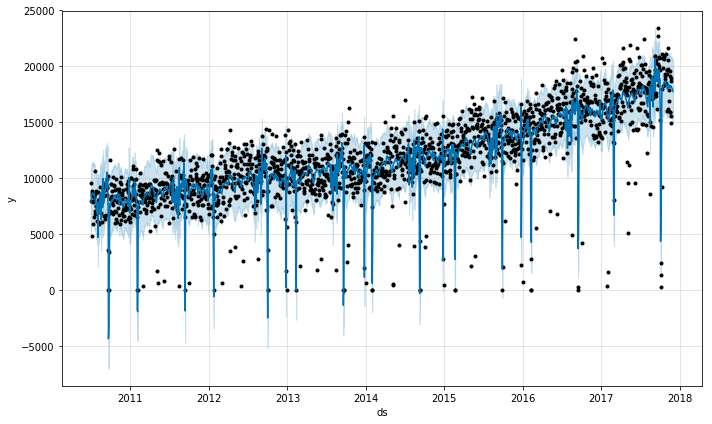

In [31]:
result_dict[1692]['weekday']['model'].plot(result_dict[1692]['weekday']['forecastProphetTable'])

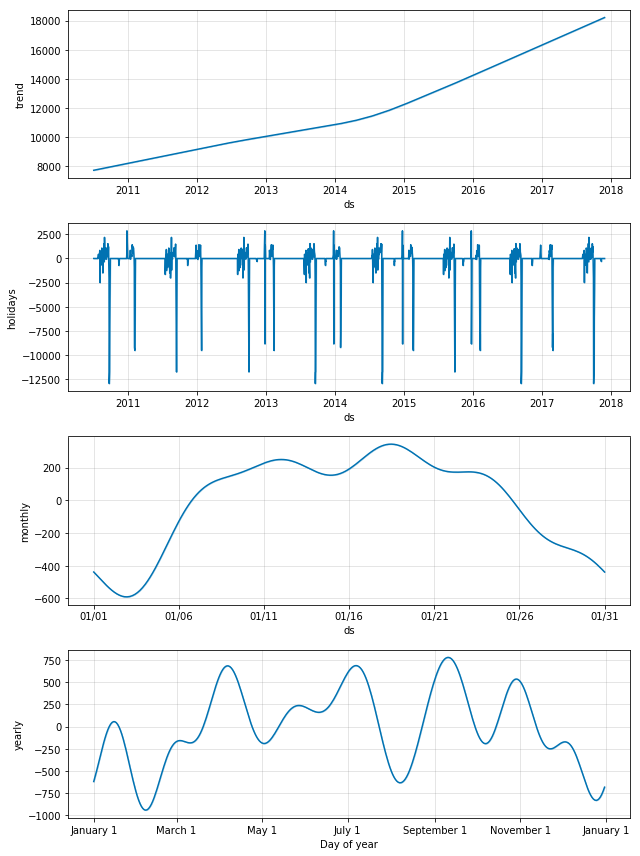

In [32]:
result_dict[1692]['weekday']['model'].plot_components(result_dict[1692]['weekday']['forecastProphetTable'])

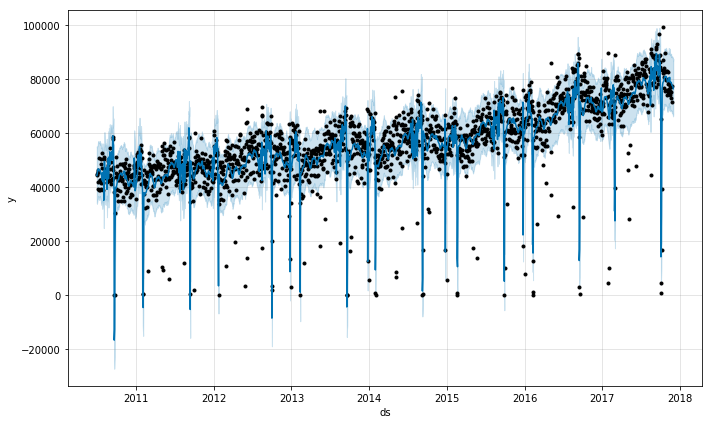

In [33]:
result_dict[1815]['weekday']['model'].plot(result_dict[1815]['weekday']['forecastProphetTable'])

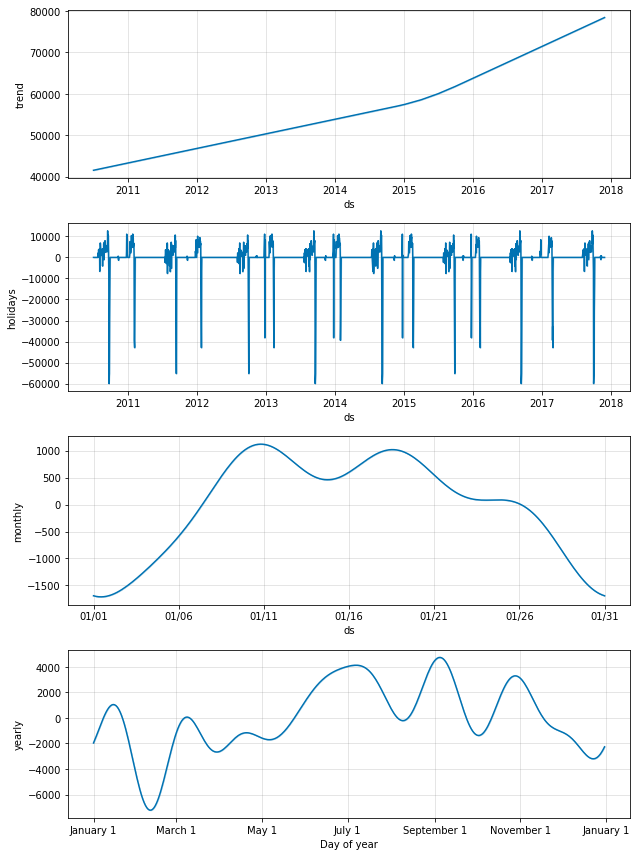

In [34]:
result_dict[1815]['weekday']['model'].plot_components(result_dict[1815]['weekday']['forecastProphetTable'])

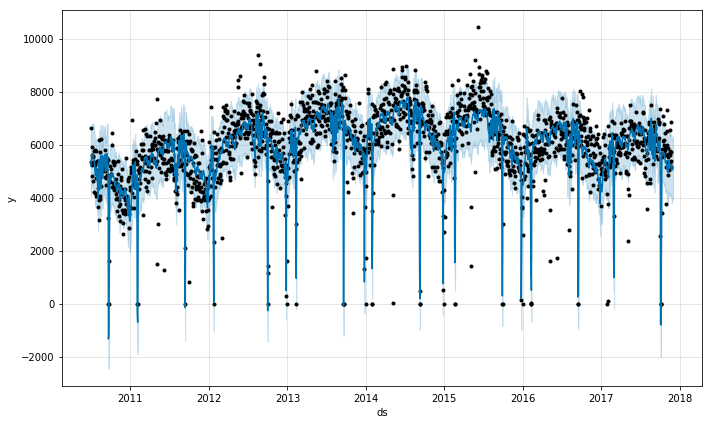

In [35]:
result_dict[1853]['weekday']['model'].plot(result_dict[1853]['weekday']['forecastProphetTable'])

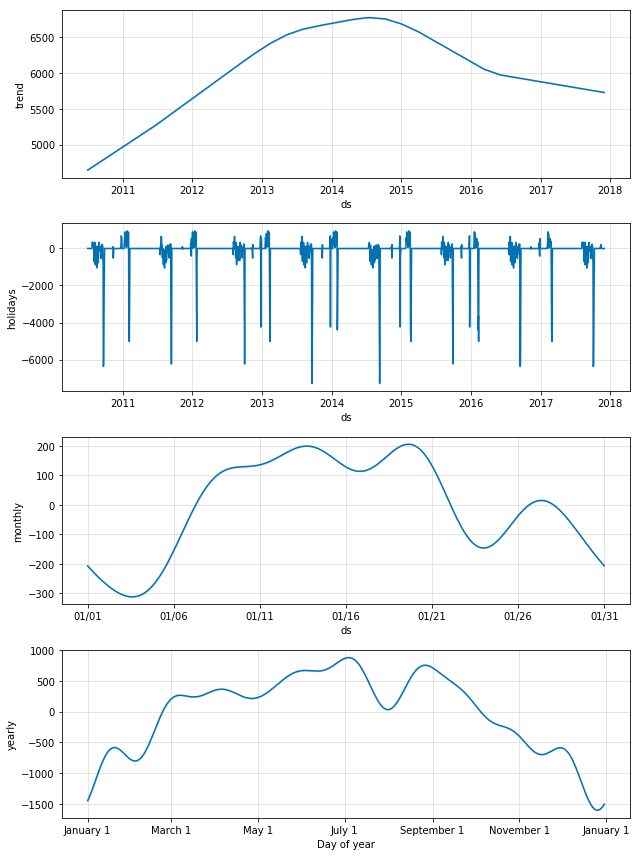

In [36]:
result_dict[1853]['weekday']['model'].plot_components(result_dict[1853]['weekday']['forecastProphetTable'])

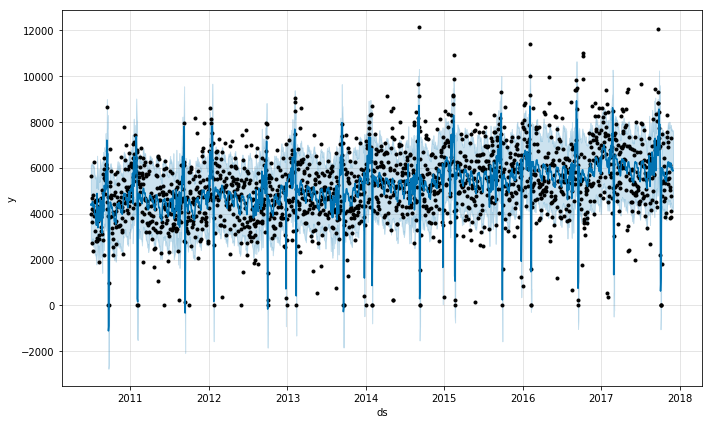

In [37]:
result_dict[1878]['weekday']['model'].plot(result_dict[1878]['weekday']['forecastProphetTable'])

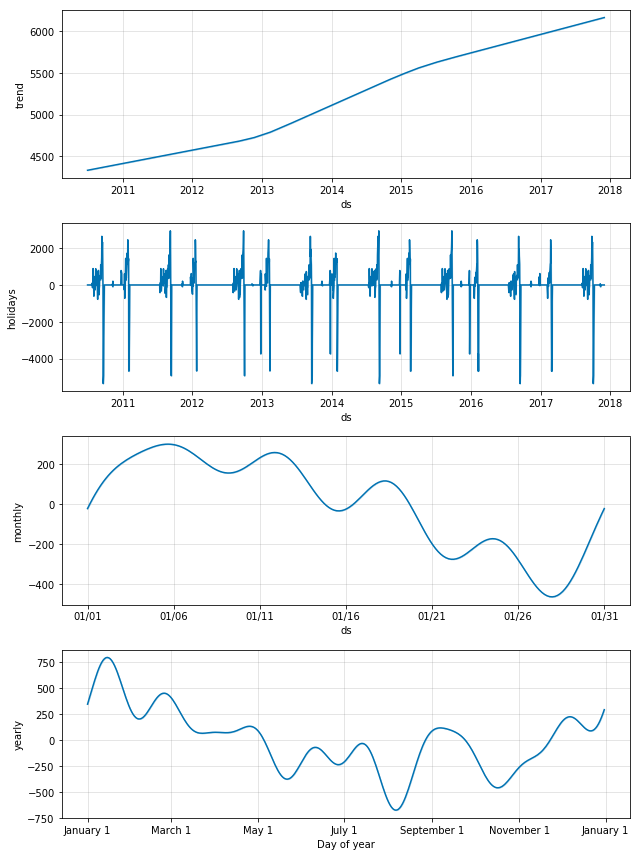

In [38]:
result_dict[1878]['weekday']['model'].plot_components(result_dict[1878]['weekday']['forecastProphetTable'])

In [39]:
df_weekday= {}
split_point= 7
for i in range(split_point):
    df_splited= df_raw.loc[df_raw.ds.apply(lambda x: x.weekday())==i]
    df_weekday[i]= {}
    for y in y_col:
        df_weekday[i][y]= ft_c.train_test_sample(
            df_splited, y, x_col, forecastday= varr.FORECASTDAY//split_point)

In [40]:
result_dict= {}
for y in y_col:
    result_dict[y]= {
                    'mon': prpt.Bayseian2(df_weekday[0][y], 'week', holidaybeta= varr.HOLYDAYBETA_revised),\
                    'tue': prpt.Bayseian2(df_weekday[1][y], 'week', holidaybeta= varr.HOLYDAYBETA_revised),\
                    'wed': prpt.Bayseian2(df_weekday[2][y], 'week', holidaybeta= varr.HOLYDAYBETA_revised),\
                    'thu': prpt.Bayseian2(df_weekday[3][y], 'week', holidaybeta= varr.HOLYDAYBETA_revised),\
                    'pri': prpt.Bayseian2(df_weekday[4][y], 'week', holidaybeta= varr.HOLYDAYBETA_revised),\
                    'sat': prpt.Bayseian2(df_weekday[5][y], 'week', holidaybeta= varr.HOLYDAYBETA_revised),\
                    'sun': prpt.Bayseian2(df_weekday[6][y], 'week', holidaybeta= varr.HOLYDAYBETA_revised),\
                    }

In [41]:
merged_dict={}
for y in y_col:
    merged_dict[y]={'future': 
                    pd.concat([result_dict[y]['mon']['future'],\
                              result_dict[y]['tue']['future'],\
                              result_dict[y]['wed']['future'],\
                              result_dict[y]['thu']['future'],\
                              result_dict[y]['pri']['future'],\
                              result_dict[y]['sat']['future'],\
                              result_dict[y]['sun']['future']],\
                              axis= 0).sort_values(by='ds', axis=0),
                   'forecastProphetTable':
                    pd.concat([result_dict[y]['mon']['forecastProphetTable'],\
                              result_dict[y]['tue']['forecastProphetTable'],\
                              result_dict[y]['wed']['forecastProphetTable'],\
                              result_dict[y]['thu']['forecastProphetTable'],\
                              result_dict[y]['pri']['forecastProphetTable'],\
                              result_dict[y]['sat']['forecastProphetTable'],\
                              result_dict[y]['sun']['forecastProphetTable']],\
                              axis= 0).sort_values(by='ds', axis=0)
                   }

In [42]:
forecast_dict={}
print(INPUT_FILENAME)
for y in y_col:
    merged_dict[y]['future']['ds']= pd.to_datetime(merged_dict[y]['future']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    merged_dict[y]['forecastProphetTable']['ds']= pd.to_datetime(merged_dict[y]['forecastProphetTable']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    forecast_dict[y]= prpt.extract_info_from(merged_dict[y]['future'], merged_dict[y]['forecastProphetTable'], varr.FORECASTDAY)
    forecast_dict[y]['result_df']= pd.merge(forecast_dict[y]['result_df'], df_raw[['ds', y]], how='inner', on='ds')
    print('RMSE with segment '+str(y)+': '+str(calc.rms_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE with segment '+str(y)+': '+str(calc.map_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_with_std with segment '+str(y)+': '+str(calc.map_error_with_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_div_std with segment '+str(y)+': '+str(calc.map_error_div_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('sMAPE of company code '+str(y)+': '+str(calc.smap_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print(forecast_dict[y]['result_df'].head())
    ft_c.save_as_xlsx(varr.PJ_DIR+varr.DF_DIR, forecast_dict[y]['result_df'], INPUT_FILENAME, '_seg'+str(y)+'withweekday')
    print('\n')

KPP일별투입(10_17)_withobject.xlsx
RMSE with segment 1041: 1118.49542044
MAPE with segment 1041: inf
MAPE_with_std with segment 1041: 33.8376181975
MAPE_div_std with segment 1041: 98.825917021
sMAPE of company code 1041: 16.0437063439
          ds  temp_max  temp_min  rain_amount         yhat  1041
0 2017-11-24       2.9      -2.5          0.1  6505.710794  8733
1 2017-11-25       6.4       0.8         15.7  4985.956943  5100
2 2017-11-26       6.4      -2.4          0.0   -13.646067     0
3 2017-11-27       8.1       1.8          0.0  5047.914710  4866
4 2017-11-28       9.8       4.2          1.2  5225.971643  5723


RMSE with segment 1692: 1348.81333606
MAPE with segment 1692: inf
MAPE_with_std with segment 1692: 19.4070549523
MAPE_div_std with segment 1692: 88.1836770709
sMAPE of company code 1692: 8.10717544315
          ds  temp_max  temp_min  rain_amount          yhat   1692
0 2017-11-24       2.9      -2.5          0.1  18122.355122  18452
1 2017-11-25       6.4       0.8         1

C:\Nextop\nextop-engine\nextop_engine\_element\calculations.py:13: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




RMSE with segment 1853: 872.134353724
MAPE with segment 1853: inf
MAPE_with_std with segment 1853: 38.0602746108
MAPE_div_std with segment 1853: 82.335834633
sMAPE of company code 1853: 13.6632419248
          ds  temp_max  temp_min  rain_amount         yhat  1853
0 2017-11-24       2.9      -2.5          0.1  5174.666117  5928
1 2017-11-25       6.4       0.8         15.7  1742.167680  1885
2 2017-11-26       6.4      -2.4          0.0  -231.396308     0
3 2017-11-27       8.1       1.8          0.0  5414.439372  5417
4 2017-11-28       9.8       4.2          1.2  5106.351084  7159


RMSE with segment 1878: 1088.20123948
MAPE with segment 1878: inf
MAPE_with_std with segment 1878: 30.9443835388
MAPE_div_std with segment 1878: 71.0170088723
sMAPE of company code 1878: 15.9647096657
          ds  temp_max  temp_min  rain_amount         yhat  1878
0 2017-11-24       2.9      -2.5          0.1  7234.660563  7409
1 2017-11-25       6.4       0.8         15.7  2747.706652  2604
2 2017-11-

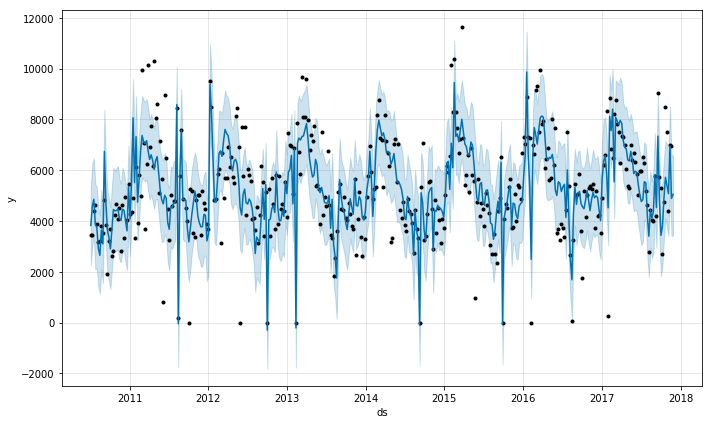

In [43]:
result_dict[1041]['mon']['model'].plot(result_dict[1041]['mon']['forecastProphetTable'])

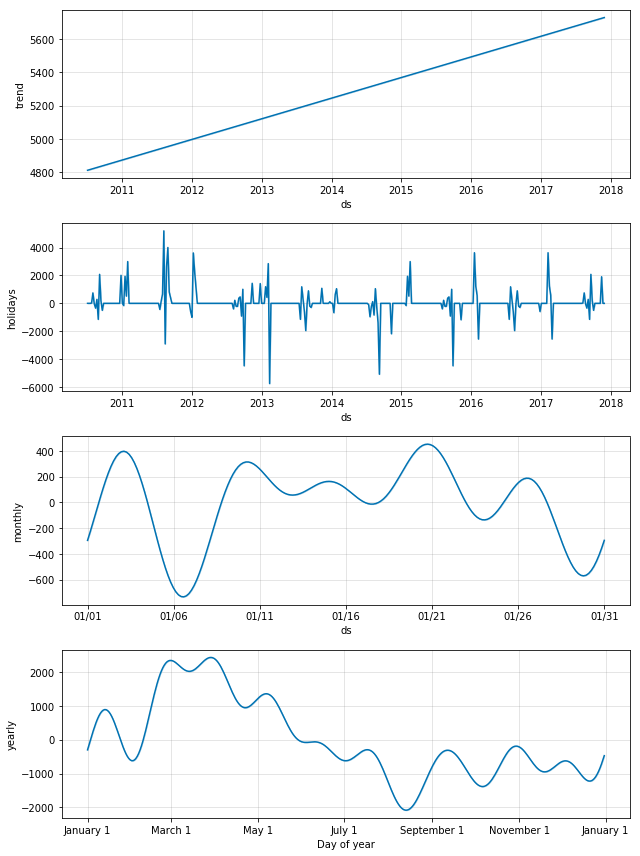

In [44]:
result_dict[1041]['mon']['model'].plot_components(result_dict[1041]['mon']['forecastProphetTable'])

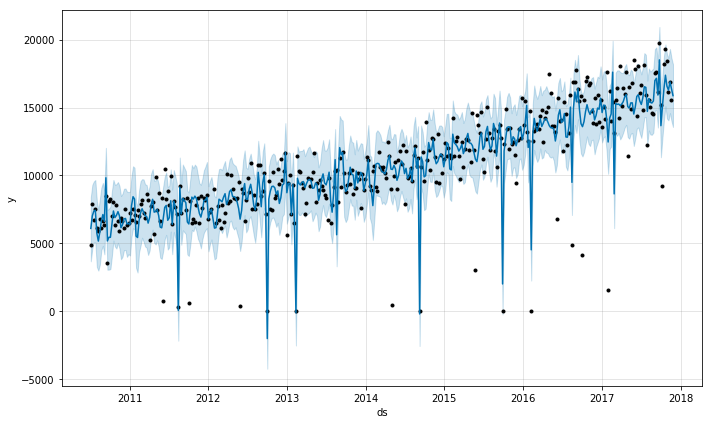

In [45]:
result_dict[1692]['mon']['model'].plot(result_dict[1692]['mon']['forecastProphetTable'])

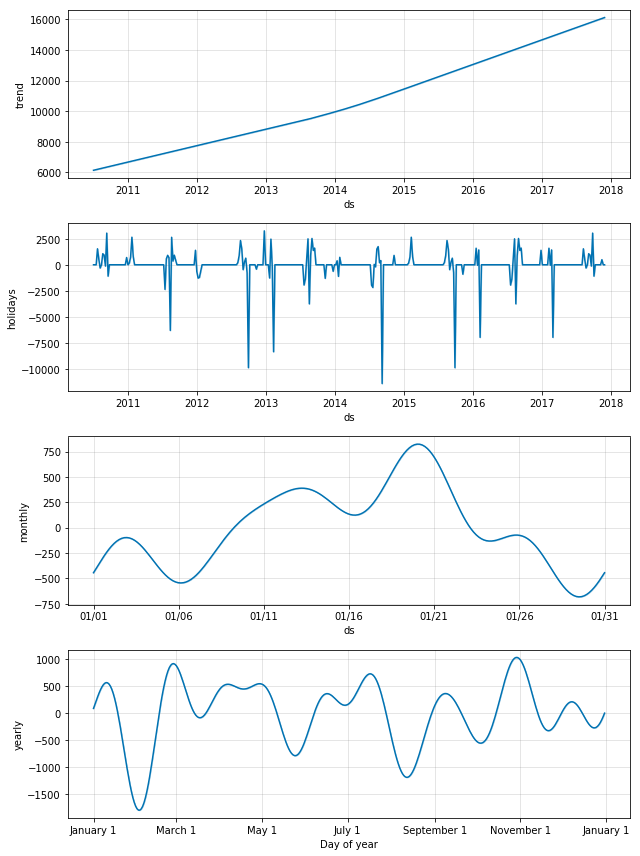

In [46]:
result_dict[1692]['mon']['model'].plot_components(result_dict[1692]['mon']['forecastProphetTable'])

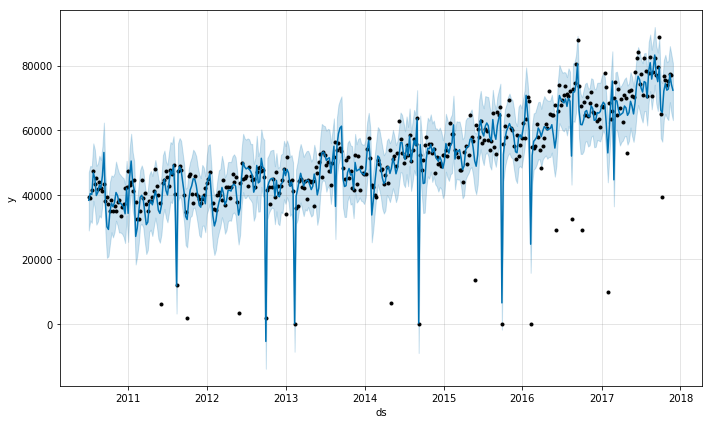

In [47]:
result_dict[1815]['mon']['model'].plot(result_dict[1815]['mon']['forecastProphetTable'])

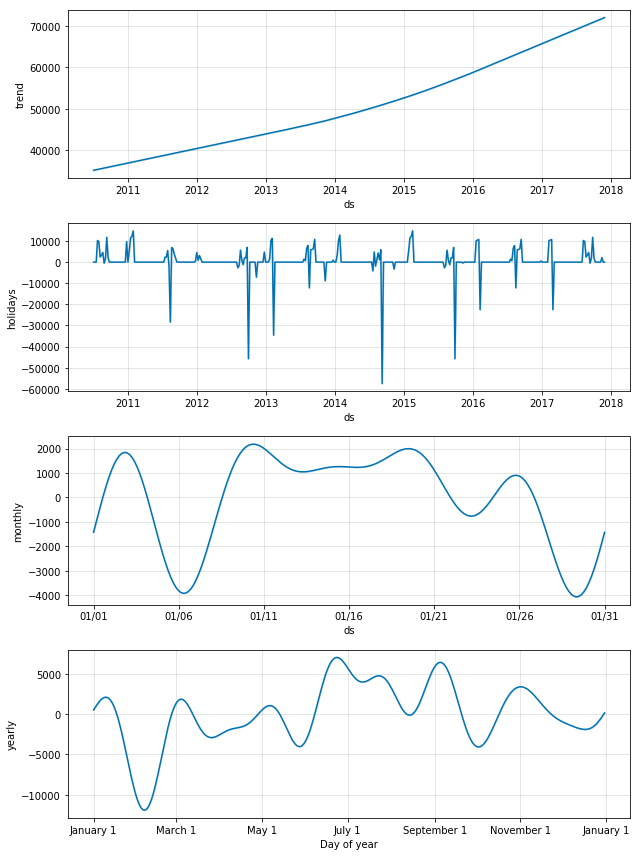

In [48]:
result_dict[1815]['mon']['model'].plot_components(result_dict[1815]['mon']['forecastProphetTable'])

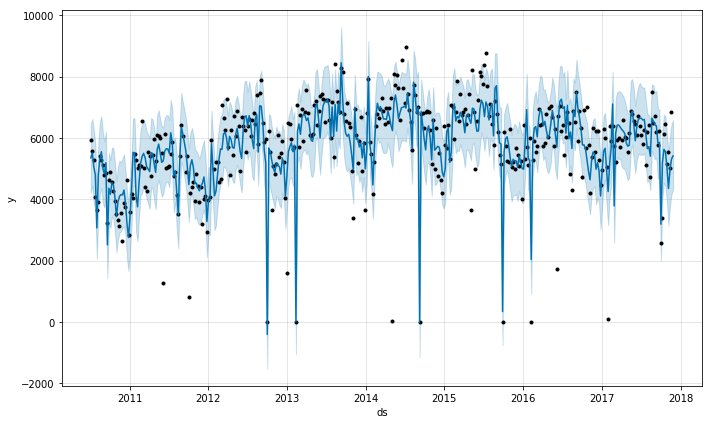

In [49]:
result_dict[1853]['mon']['model'].plot(result_dict[1853]['mon']['forecastProphetTable'])

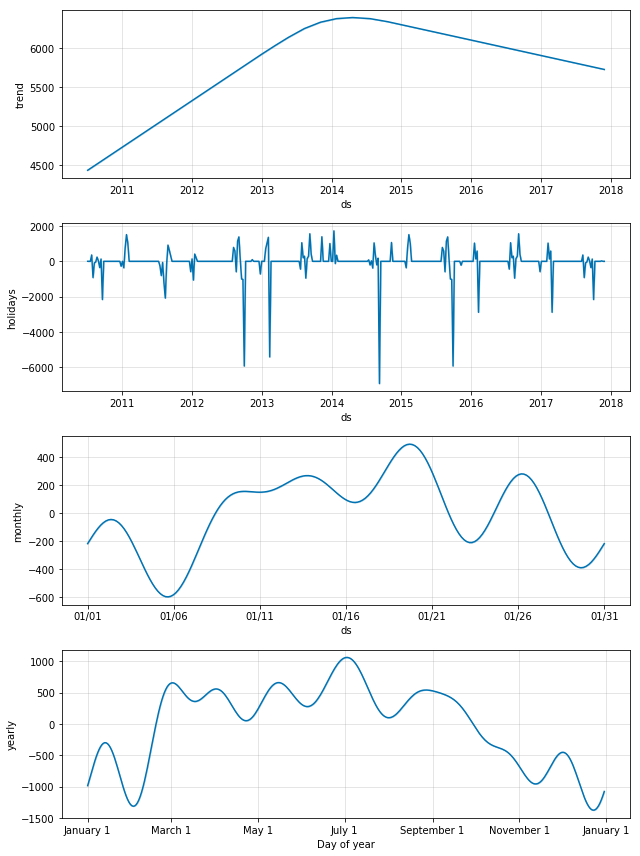

In [50]:
result_dict[1853]['mon']['model'].plot_components(result_dict[1853]['mon']['forecastProphetTable'])

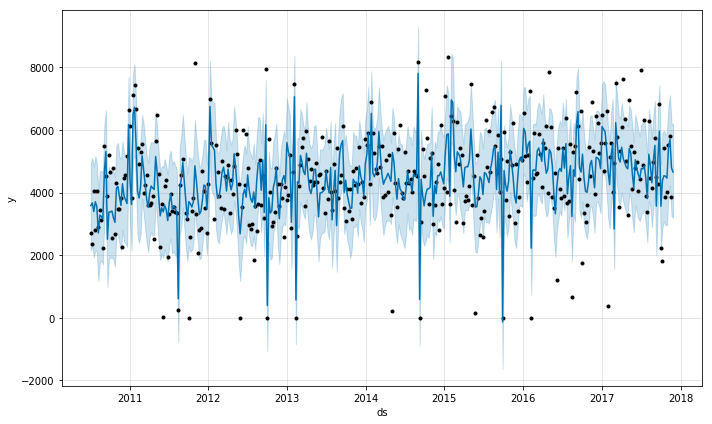

In [51]:
result_dict[1878]['mon']['model'].plot(result_dict[1878]['mon']['forecastProphetTable'])

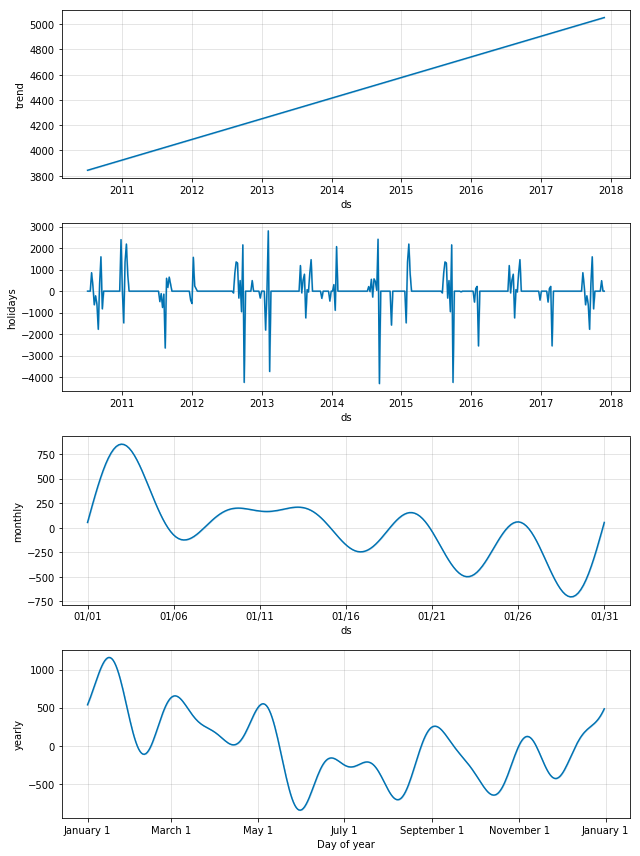

In [52]:
result_dict[1878]['mon']['model'].plot_components(result_dict[1878]['mon']['forecastProphetTable'])

In [53]:
result_dict= {}
for y in y_col:
    traintest_dict= ft_c.train_test_sample(df_raw, y, x_col, forecastday= 7)
    result_dict[y]= prpt.Bayseian2(traintest_dict, 'day', holidaybeta= varr.HOLYDAYBETA_revised)

In [54]:
forecast_dict= {}
print(INPUT_FILENAME)
for y in y_col:
    result_dict[y]['future']['ds']= pd.to_datetime(result_dict[y]['future']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    result_dict[y]['forecastProphetTable']['ds']= pd.to_datetime(result_dict[y]['forecastProphetTable']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    forecast_dict[y]= prpt.extract_info_from(result_dict[y]['future'], result_dict[y]['forecastProphetTable'], varr.FORECASTDAY)
    forecast_dict[y]['result_df']= pd.merge(forecast_dict[y]['result_df'], df_raw[['ds', y]], how='inner', on='ds')
    print('RMSE with segment '+str(y)+': '+str(calc.rms_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE with segment '+str(y)+': '+str(calc.map_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_with_std with segment '+str(y)+': '+str(calc.map_error_with_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_div_std with segment '+str(y)+': '+str(calc.map_error_div_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('sMAPE of company code '+str(y)+': '+str(calc.smap_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print(forecast_dict[y]['result_df'].head())
    ft_c.save_as_xlsx(varr.PJ_DIR+varr.DF_DIR, forecast_dict[y]['result_df'], INPUT_FILENAME, '_seg'+str(y)+'withoutweekday')
    print('\n')

KPP일별투입(10_17)_withobject.xlsx
RMSE with segment 1041: 992.642879921
MAPE with segment 1041: inf
MAPE_with_std with segment 1041: 36.2210824632
MAPE_div_std with segment 1041: 95.5198006772
sMAPE of company code 1041: 13.9864620761
          ds  temp_max  temp_min  rain_amount         yhat  1041
0 2017-11-24       2.9      -2.5          0.1  6708.377027  8733
1 2017-11-25       6.4       0.8         15.7  5128.432462  5100
2 2017-11-26       6.4      -2.4          0.0  -281.069386     0
3 2017-11-27       8.1       1.8          0.0  5057.681561  4866
4 2017-11-28       9.8       4.2          1.2  5508.617957  5723




C:\Nextop\nextop-engine\nextop_engine\_element\calculations.py:13: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


RMSE with segment 1692: 2410.57951998
MAPE with segment 1692: inf
MAPE_with_std with segment 1692: 27.4389974793
MAPE_div_std with segment 1692: 77.4447604051
sMAPE of company code 1692: 13.0350703677
          ds  temp_max  temp_min  rain_amount          yhat   1692
0 2017-11-24       2.9      -2.5          0.1  17144.550967  18452
1 2017-11-25       6.4       0.8         15.7  11292.222135   8574
2 2017-11-26       6.4      -2.4          0.0   4949.975532      0
3 2017-11-27       8.1       1.8          0.0  15414.863258  17934
4 2017-11-28       9.8       4.2          1.2  16963.751509  16298


RMSE with segment 1815: 7659.75787329
MAPE with segment 1815: 2380.93759858
MAPE_with_std with segment 1815: 25.9943843849
MAPE_div_std with segment 1815: 82.8941711773
sMAPE of company code 1815: 10.0807076977
          ds  temp_max  temp_min  rain_amount          yhat   1815
0 2017-11-24       2.9      -2.5          0.1  75043.459704  70495
1 2017-11-25       6.4       0.8         15.7  480

In [25]:
df_weekday= {}
for y in y_col:
    df_weekday[y]= {}
    df_weekday[y]['weekday']= ft_c.train_test_sample(df_weekday_weekdays, y, x_col, forecastday= 5)
    df_weekday[y]['sat']= ft_c.train_test_sample(df_weekday_sat, y, x_col, forecastday= 1)
    df_weekday[y]['sun']= ft_c.train_test_sample(df_weekday_sun, y, x_col, forecastday= 1)

In [26]:
result_dict= {}
for y in y_col:
    result_dict[y]= {
                    'weekday': prpt.Bayseian2(df_weekday[y]['weekday'], 'week', holidaybeta= None),\
                    'sat': prpt.Bayseian2(df_weekday[y]['sat'], 'week', holidaybeta= None),\
                    'sun': prpt.Bayseian2(df_weekday[y]['sun'], 'week', holidaybeta= None),\
                    }

In [27]:
merged_dict={}
for y in y_col:
    merged_dict[y]={'future': 
                    pd.concat([result_dict[y]['weekday']['future'],\
                              result_dict[y]['sat']['future'],\
                              result_dict[y]['sun']['future']],\
                              axis= 0).sort_values(by='ds', axis=0),
                   'forecastProphetTable':
                    pd.concat([result_dict[y]['weekday']['forecastProphetTable'],
                              result_dict[y]['sat']['forecastProphetTable'],\
                              result_dict[y]['sun']['forecastProphetTable']],\
                              axis= 0).sort_values(by='ds', axis=0)
                   }

In [28]:
forecast_dict={}
print(INPUT_FILENAME)
for y in y_col:
    merged_dict[y]['future']['ds']= pd.to_datetime(merged_dict[y]['future']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    merged_dict[y]['forecastProphetTable']['ds']= pd.to_datetime(merged_dict[y]['forecastProphetTable']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    forecast_dict[y]= prpt.extract_info_from(merged_dict[y]['future'], merged_dict[y]['forecastProphetTable'], varr.FORECASTDAY)
    forecast_dict[y]['result_df']= pd.merge(forecast_dict[y]['result_df'], df_raw[['ds', y]], how='inner', on='ds')
    print('RMSE with segment '+str(y)+': '+str(calc.rms_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE with segment '+str(y)+': '+str(calc.map_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_with_std with segment '+str(y)+': '+str(calc.map_error_with_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_div_std with segment '+str(y)+': '+str(calc.map_error_div_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('sMAPE of company code '+str(y)+': '+str(calc.smap_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print(forecast_dict[y]['result_df'].head())
    ft_c.save_as_xlsx(varr.PJ_DIR+varr.DF_DIR, forecast_dict[y]['result_df'], INPUT_FILENAME, '_seg'+str(y)+'withweekday')
    print('\n')

KPP일별투입(10_17)_withobject.xlsx
RMSE with segment 1041: 1353.79026166
MAPE with segment 1041: inf
MAPE_with_std with segment 1041: 35.7705060779
MAPE_div_std with segment 1041: 84.4237838305
sMAPE of company code 1041: 18.8155777326
          ds  temp_max  temp_min  rain_amount         yhat  1041
0 2017-11-24       2.9      -2.5          0.1  5754.427855  8733
1 2017-11-25       6.4       0.8         15.7  4894.581221  5100
2 2017-11-26       6.4      -2.4          0.0    -6.032332     0
3 2017-11-27       8.1       1.8          0.0  5583.562715  4866
4 2017-11-28       9.8       4.2          1.2  5549.325233  5723


RMSE with segment 1692: 690.815619812
MAPE with segment 1692: inf
MAPE_with_std with segment 1692: 17.1041559133
MAPE_div_std with segment 1692: 88.5710608645
sMAPE of company code 1692: 3.63927736065
          ds  temp_max  temp_min  rain_amount          yhat   1692
0 2017-11-24       2.9      -2.5          0.1  18136.642475  18452
1 2017-11-25       6.4       0.8         

C:\Nextop\nextop-engine\nextop_engine\_element\calculations.py:13: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




RMSE with segment 1853: 987.483507213
MAPE with segment 1853: inf
MAPE_with_std with segment 1853: 39.5377597826
MAPE_div_std with segment 1853: 91.3126961024
sMAPE of company code 1853: 16.5267490286
          ds  temp_max  temp_min  rain_amount         yhat  1853
0 2017-11-24       2.9      -2.5          0.1  4964.124826  5928
1 2017-11-25       6.4       0.8         15.7  1827.645457  1885
2 2017-11-26       6.4      -2.4          0.0  -210.931211     0
3 2017-11-27       8.1       1.8          0.0  4900.293705  5417
4 2017-11-28       9.8       4.2          1.2  4882.724511  7159


RMSE with segment 1878: 901.276999949
MAPE with segment 1878: inf
MAPE_with_std with segment 1878: 27.7882929258
MAPE_div_std with segment 1878: 76.4049830487
sMAPE of company code 1878: 15.0056991425
          ds  temp_max  temp_min  rain_amount         yhat  1878
0 2017-11-24       2.9      -2.5          0.1  6025.739322  7409
1 2017-11-25       6.4       0.8         15.7  2711.703155  2604
2 2017-11